# Prediction of car class

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:\\Users\\Priyabrata\\Desktop\\Repository\\Car_Class_Price\\Car_Class\\cars_class.csv')

data.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


In [3]:
data.shape

(719, 20)

In [4]:
# For unique values
for col in data.columns:
    print(f'{col}: {data[col].nunique()}')

ID: 719
Comp: 43
Circ: 27
D.Circ: 60
Rad.Ra: 132
Pr.Axis.Ra: 37
Max.L.Ra: 21
Scat.Ra: 125
Elong: 35
Pr.Axis.Rect: 13
Max.L.Rect: 66
Sc.Var.Maxis: 124
Sc.Var.maxis: 380
Ra.Gyr: 138
Skew.Maxis: 39
Skew.maxis: 23
Kurt.maxis: 38
Kurt.Maxis: 29
Holl.Ra: 31
Class: 4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [6]:
data.describe()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,360.000000,93.435327,44.851182,81.723227,168.579972,61.847010,8.625869,168.137691,41.075104,20.531293,148.030598,188.168289,436.215577,174.726008,72.682893,6.343533,12.394993,188.798331,195.407510,1.470097
std,207.701709,8.111406,6.150286,15.528208,33.809172,8.259136,4.916908,32.937591,7.764459,2.560969,14.560092,31.235395,174.964977,32.149568,7.542055,4.856169,8.742511,6.048522,7.235166,1.126477
min,1.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,180.500000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,149.000000,68.000000,2.000000,5.500000,184.000000,190.000000,0.000000
50%,360.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000,1.000000
75%,539.500000,99.000000,49.000000,96.000000,194.500000,65.000000,10.000000,197.500000,46.000000,23.000000,159.000000,216.000000,584.500000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000,2.000000
max,719.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,204.000000,211.000000,3.000000


In [7]:
data.isnull().sum()

ID              0
Comp            0
Circ            0
D.Circ          0
Rad.Ra          0
Pr.Axis.Ra      0
Max.L.Ra        0
Scat.Ra         0
Elong           0
Pr.Axis.Rect    0
Max.L.Rect      0
Sc.Var.Maxis    0
Sc.Var.maxis    0
Ra.Gyr          0
Skew.Maxis      0
Skew.maxis      0
Kurt.maxis      0
Kurt.Maxis      0
Holl.Ra         0
Class           0
dtype: int64

In [8]:
data.drop(['ID'],axis=1,inplace=True)

#### Observations
1. No null values
2. No missing values
3. No wrong data formats

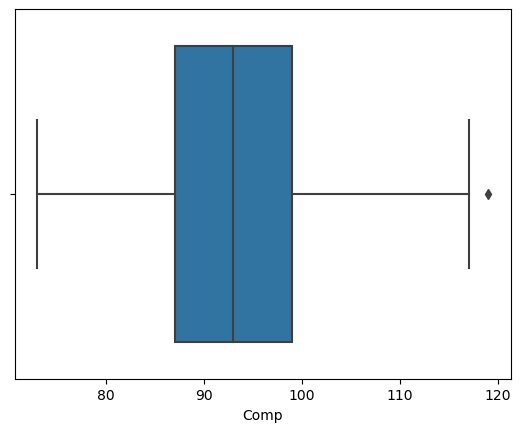

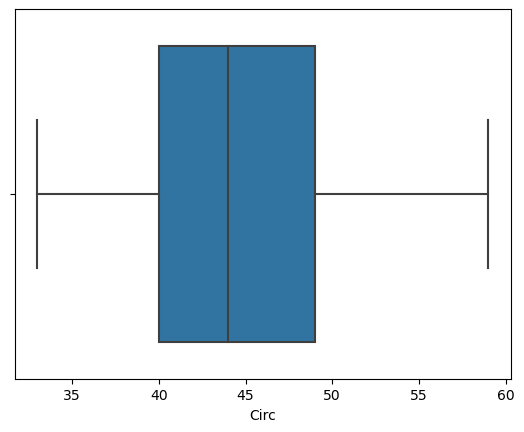

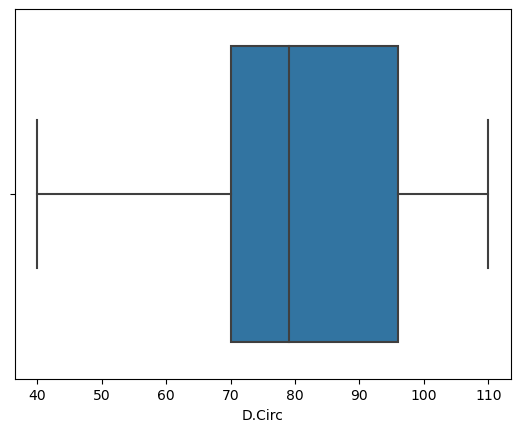

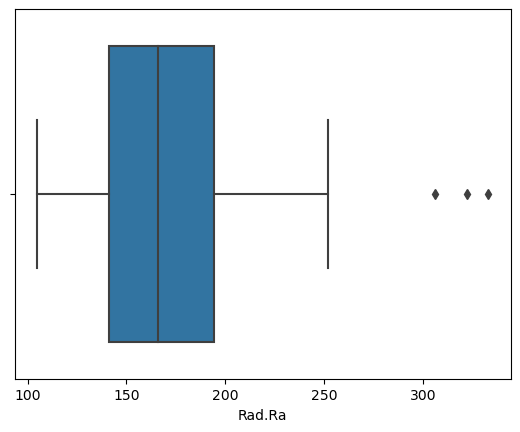

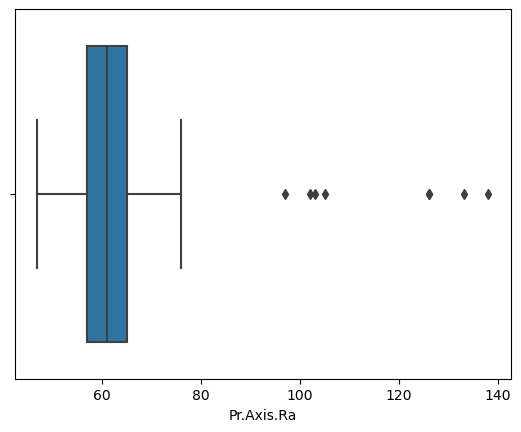

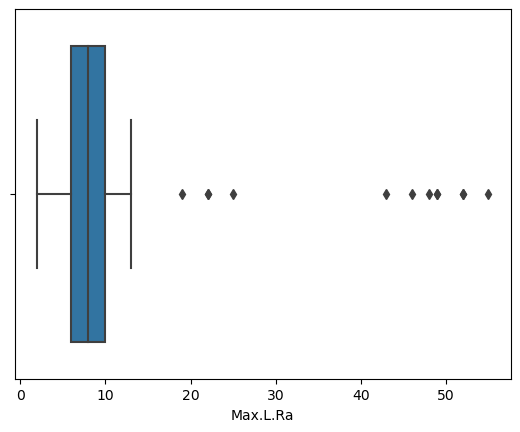

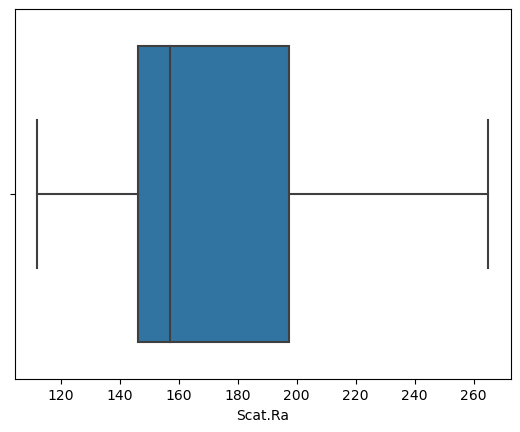

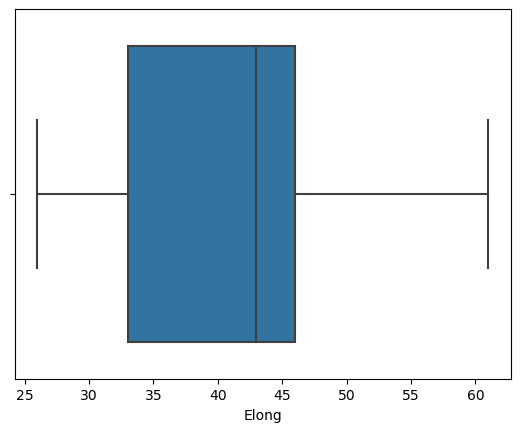

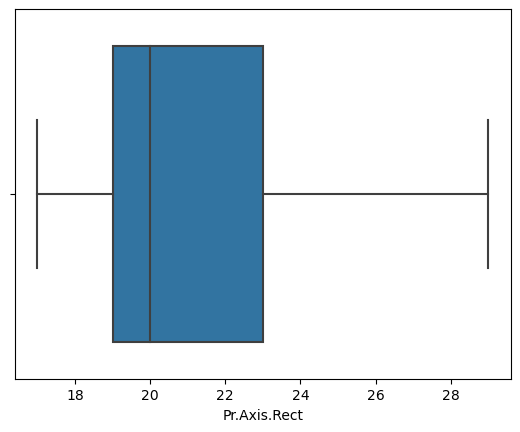

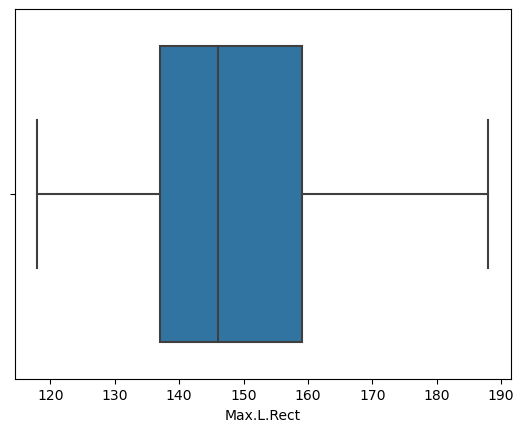

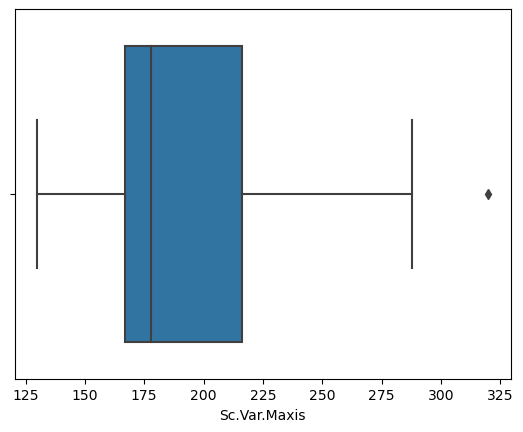

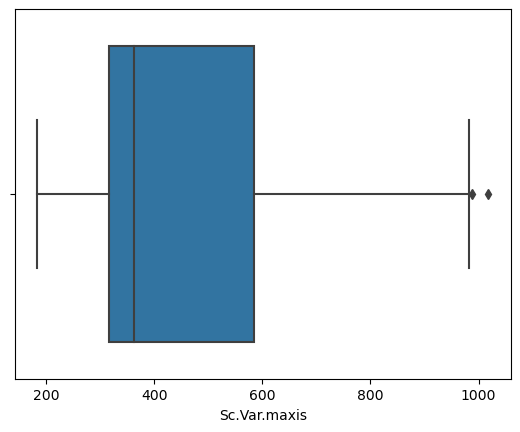

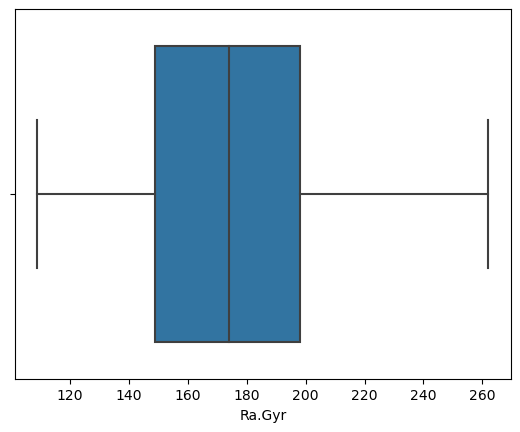

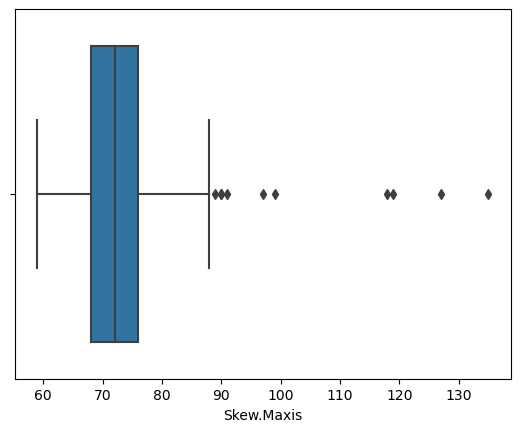

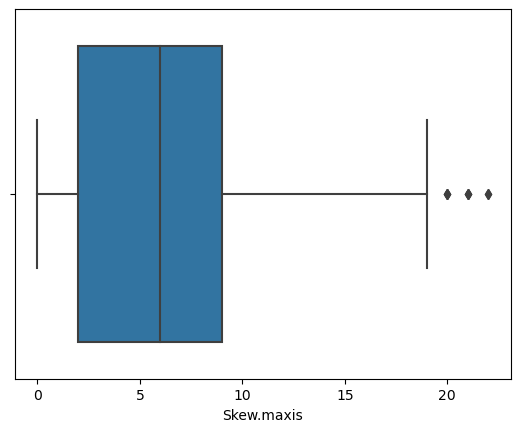

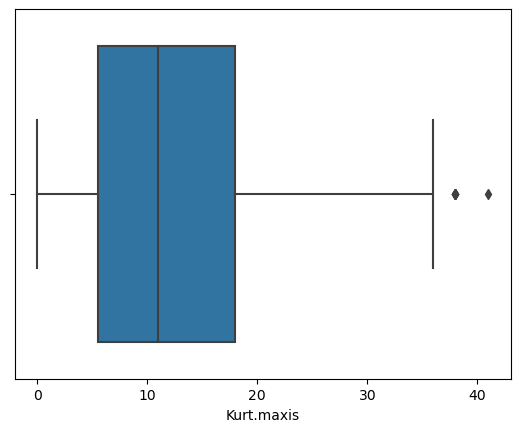

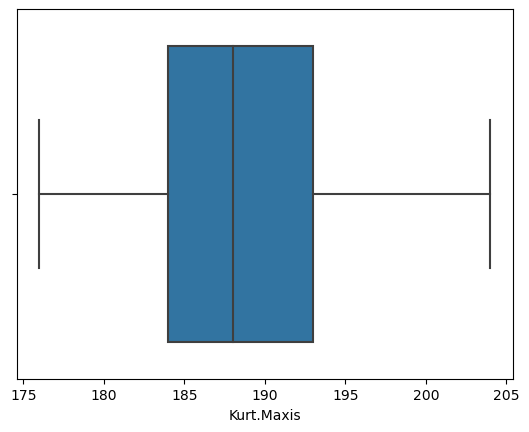

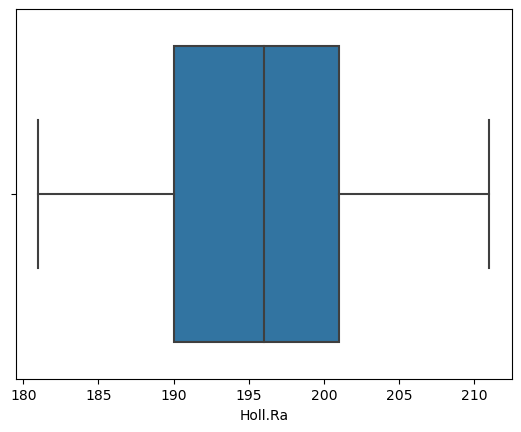

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Excluding categorical columns
s_col=['Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra', 'Scat.Ra','Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 
         'Sc.Var.Maxis', 'Sc.Var.maxis','Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis', 'Kurt.Maxis','Holl.Ra']
for col in s_col:
    sns.boxplot(data[col])
    plt.show()

### Treating Outliers

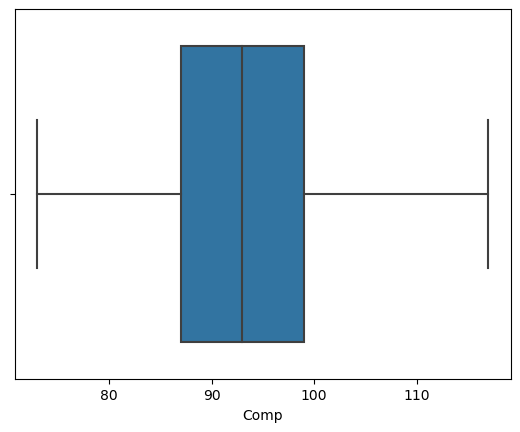

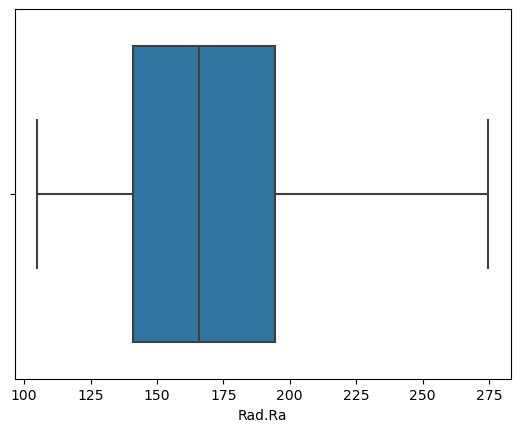

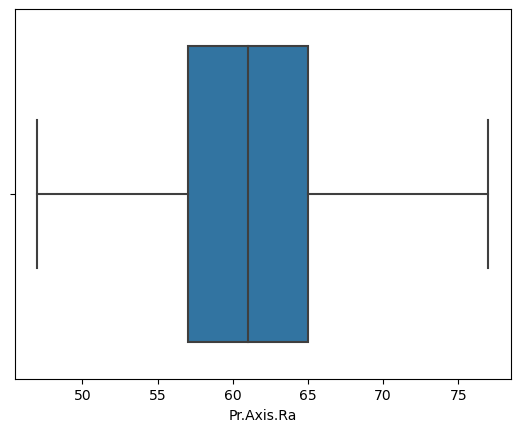

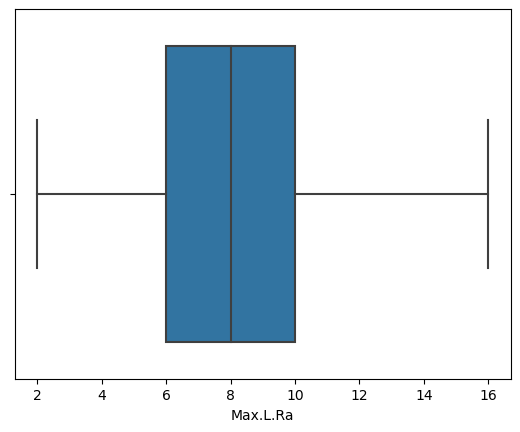

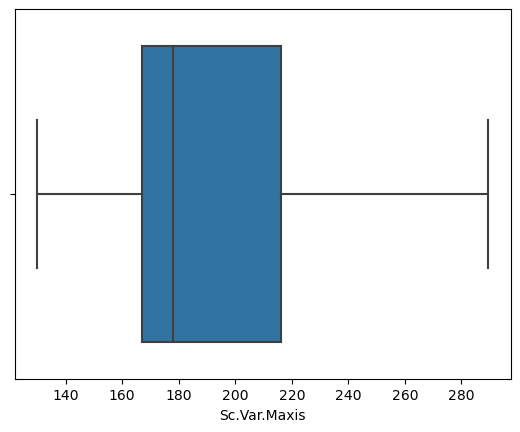

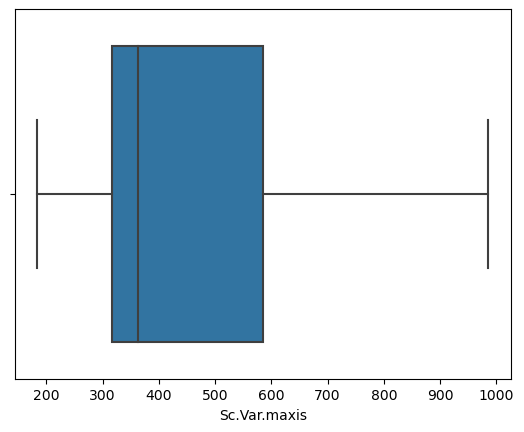

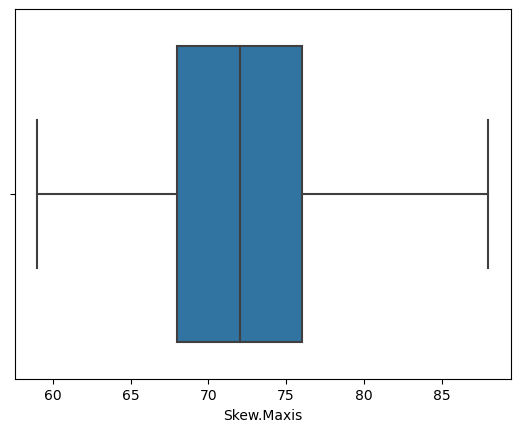

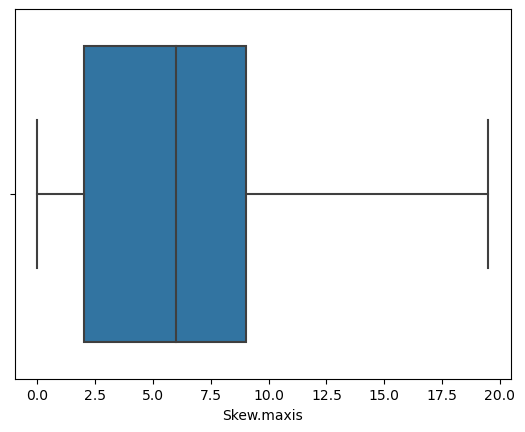

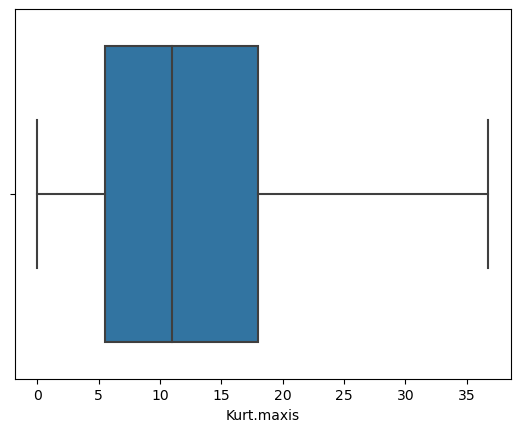

In [10]:
skew_col=['Comp', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra','Sc.Var.Maxis', 'Sc.Var.maxis', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis']
for col in skew_col:
    q25=data[col].quantile(0.25)
    q75=data[col].quantile(0.75)
    upper=q75+1.5*(q75-q25)
    lower=q25-1.5*(q75-q25)
    data[col]=np.where(data[col]>upper,upper,data[col])
    sns.boxplot(data[col])
    plt.show()

In [11]:
data.describe()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,93.432545,44.851182,81.723227,168.389777,61.410292,8.222531,168.137691,41.075104,20.531293,148.030598,188.125869,436.168985,174.726008,72.439499,6.328234,12.380389,188.798331,195.407510,1.470097
std,8.102965,6.150286,15.528208,33.066394,5.921958,2.318148,32.937591,7.764459,2.560969,14.560092,31.076414,174.814217,32.149568,6.423659,4.811566,8.699593,6.048522,7.235166,1.126477
min,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,149.000000,68.000000,2.000000,5.500000,184.000000,190.000000,0.000000
50%,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000,1.000000
75%,99.000000,49.000000,96.000000,194.500000,65.000000,10.000000,197.500000,46.000000,23.000000,159.000000,216.000000,584.500000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000,2.000000
max,117.000000,59.000000,110.000000,274.750000,77.000000,16.000000,265.000000,61.000000,29.000000,188.000000,289.500000,985.750000,262.000000,88.000000,19.500000,36.750000,204.000000,211.000000,3.000000


### Treating Skewness

In [12]:
# (Before log_Transformation)
from scipy.stats import skew
for col in s_col:
    print(f'{col} Skewness:  {skew(data[col])}')

Comp Skewness:  0.3592898765123068
Circ Skewness:  0.28200735106679115
D.Circ Skewness:  0.132431157651249
Rad.Ra Skewness:  0.24093217070405454
Pr.Axis.Ra Skewness:  0.28336118128374005
Max.L.Ra Skewness:  0.5538348897833593
Scat.Ra Skewness:  0.6366035554558317
Elong Skewness:  0.008565557193410225
Pr.Axis.Rect Skewness:  0.8049332957375396
Max.L.Rect Skewness:  0.28185134084007574
Sc.Var.Maxis Skewness:  0.6487623110699994
Sc.Var.maxis Skewness:  0.8542694681223361
Ra.Gyr Skewness:  0.2710772869703467
Skew.Maxis Skewness:  0.5849428512250079
Skew.maxis Skewness:  0.6732747723688303
Kurt.maxis Skewness:  0.6455441219450406
Kurt.Maxis Skewness:  0.24796199928716087
Holl.Ra Skewness:  -0.21062543728409952


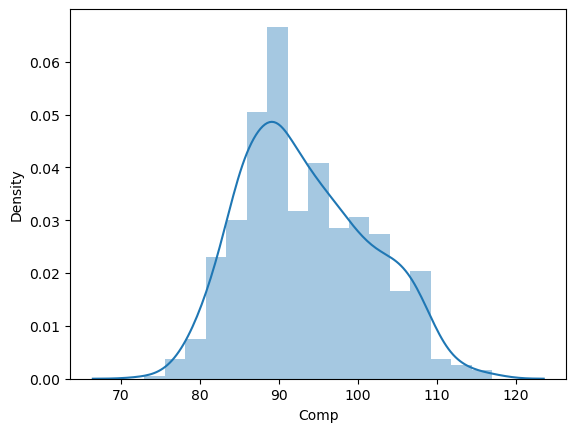

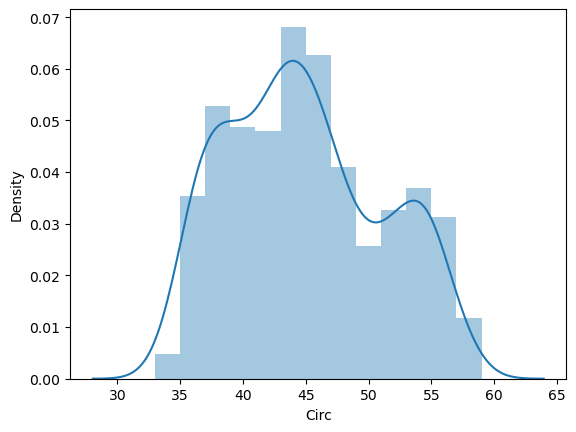

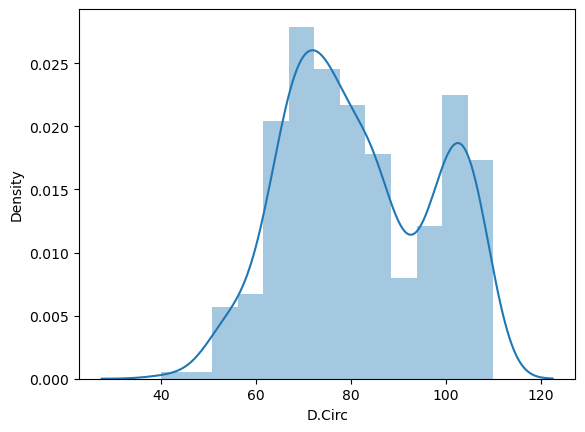

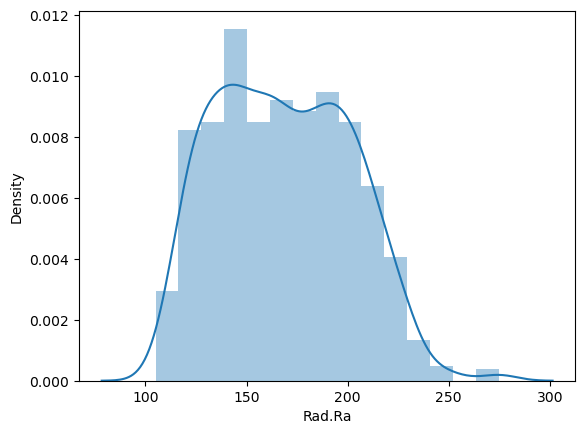

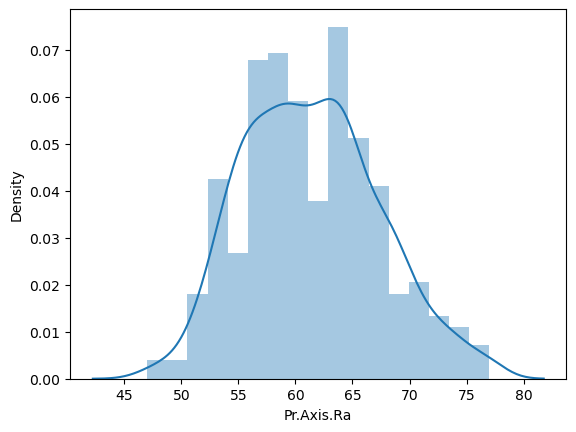

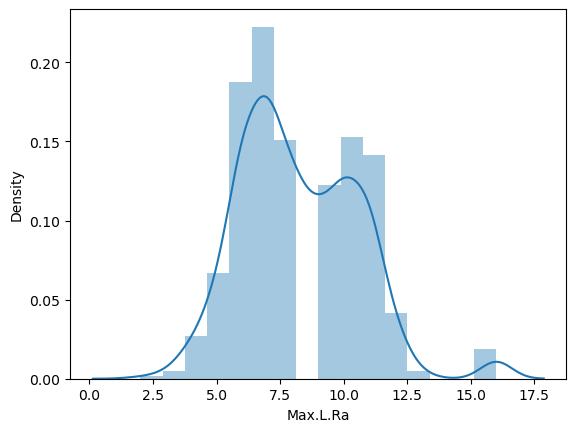

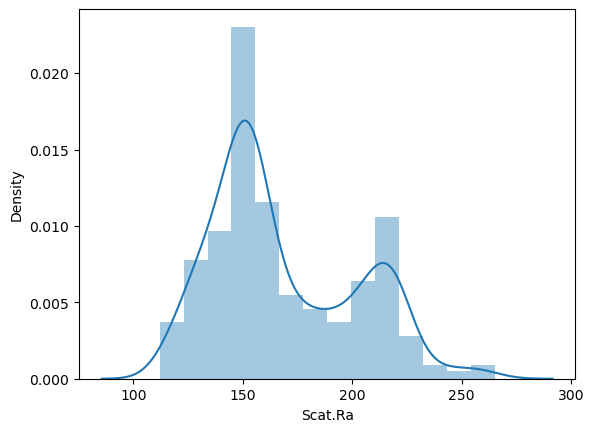

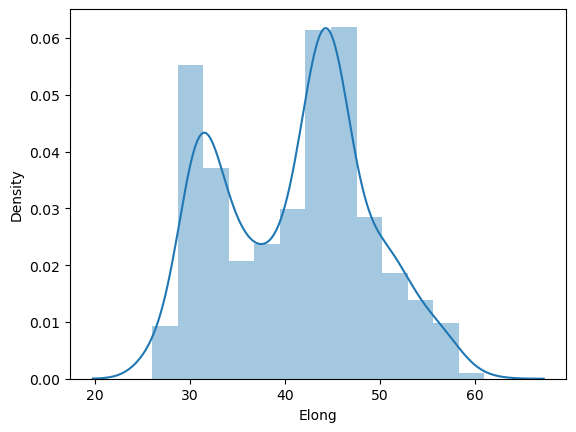

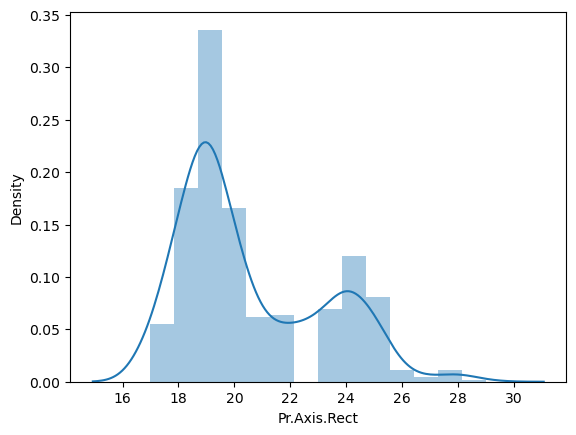

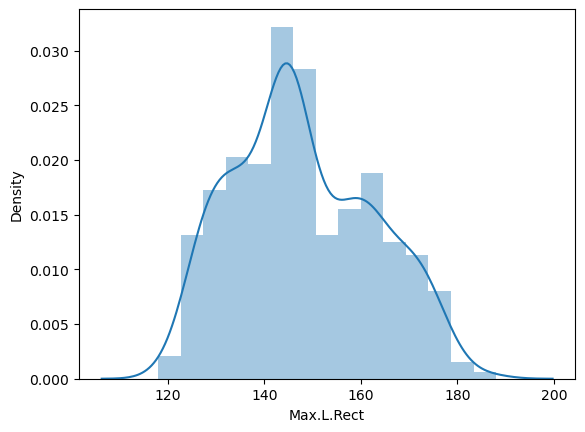

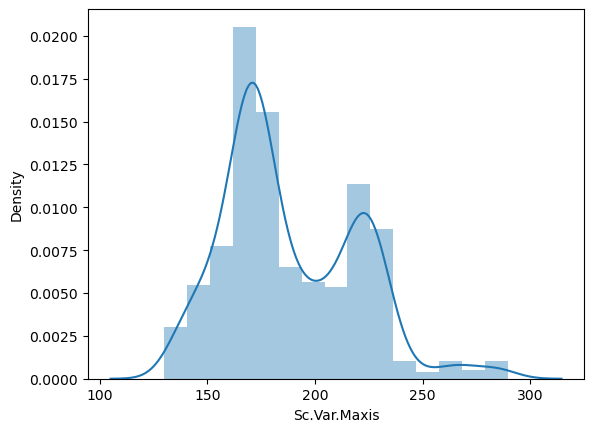

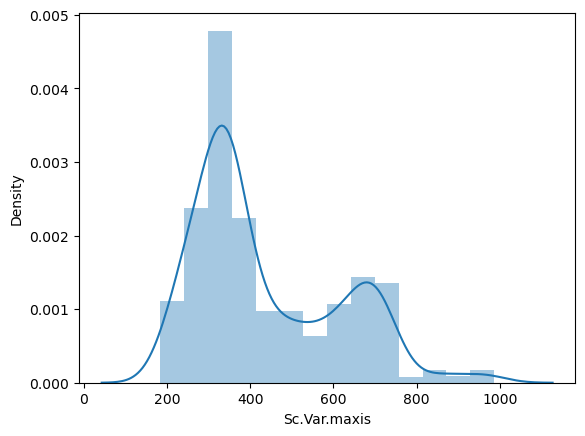

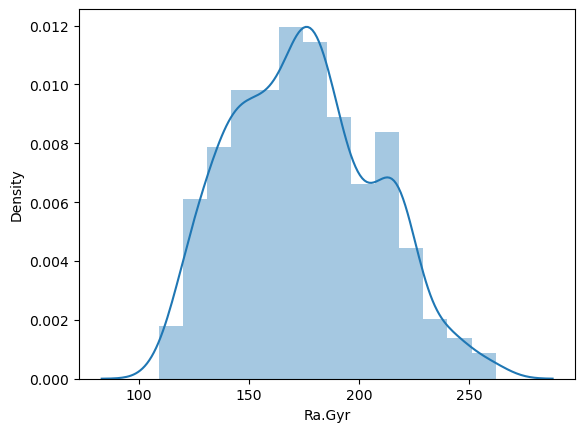

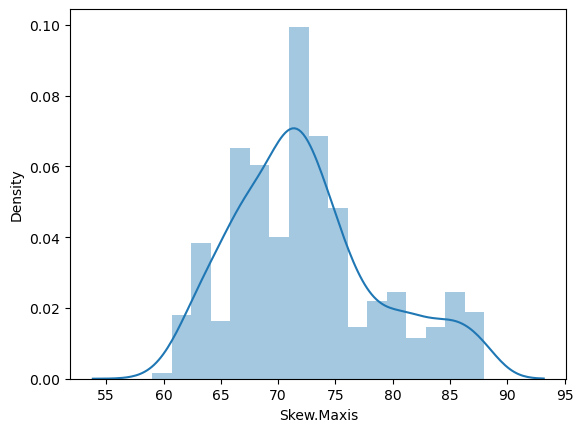

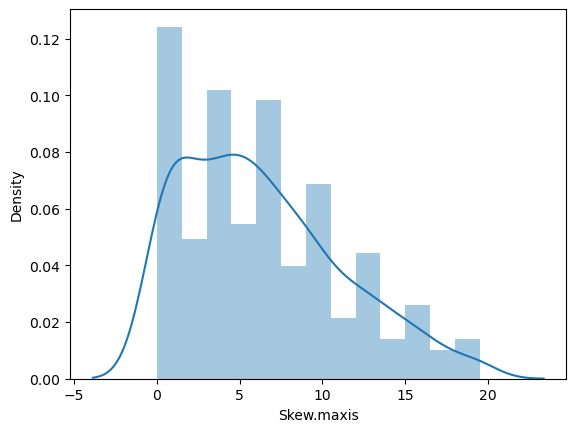

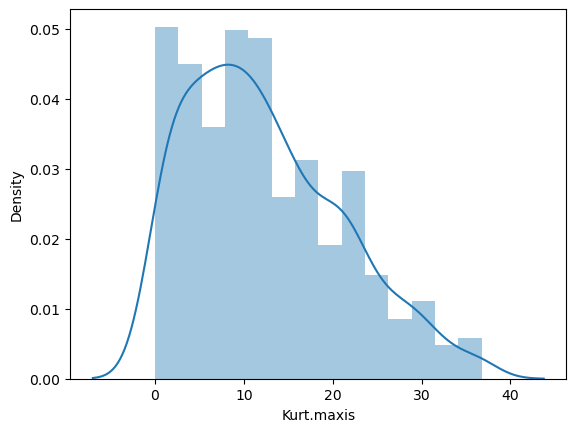

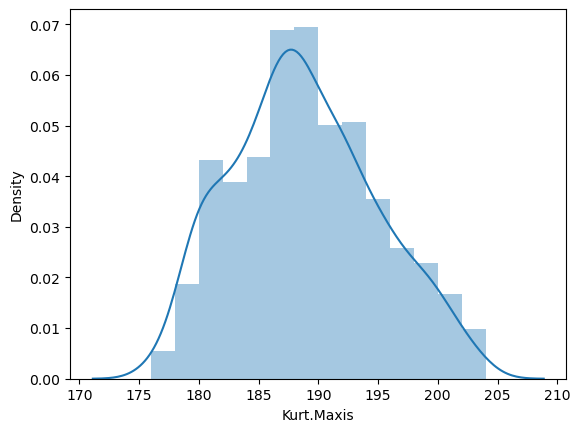

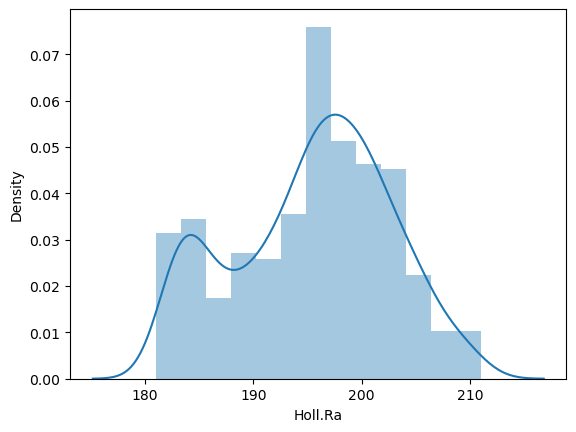

In [13]:
for col in s_col:
    sns.distplot(data[col]) #(hist=False,kde=False)
    plt.show()

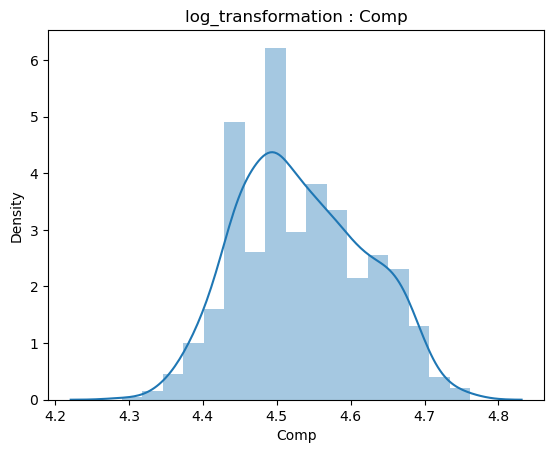

Comp Skewness:  0.18869798408045158


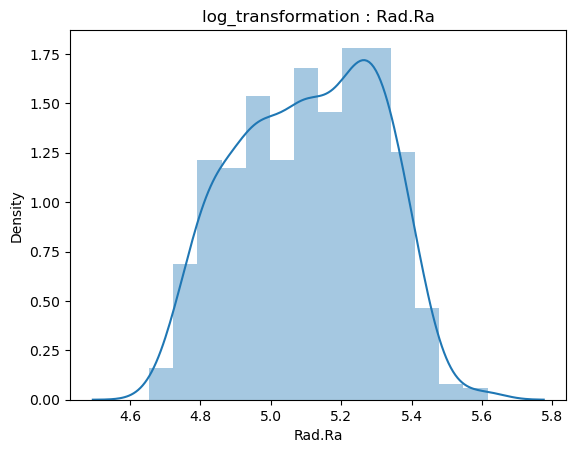

Rad.Ra Skewness:  -0.09495194041162251


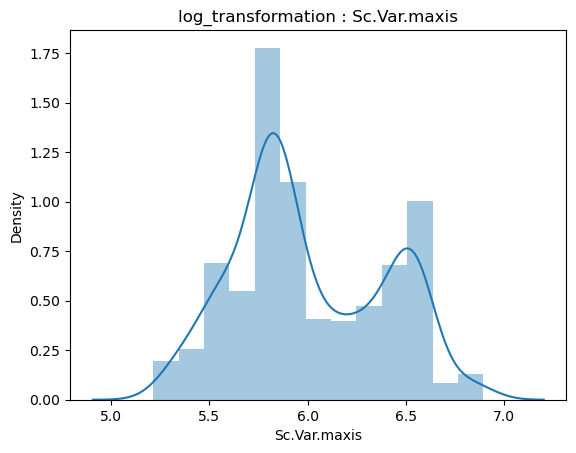

Sc.Var.maxis Skewness:  0.3125124982032962
Skew.maxis skipped due to zero or negative value
Kurt.maxis skipped due to zero or negative value


In [14]:
sk_col=['Comp', 'Rad.Ra','Sc.Var.maxis','Skew.maxis', 'Kurt.maxis']
for col in sk_col:
    if (data[col]<=0).any():
        print(f'{col} skipped due to zero or negative value') #['Skew.maxis', 'Kurt.maxis']
        continue
    data[col]=np.log(data[col])
    sns.distplot(data[col])
    plt.title(f'log_transformation : {col}')
    plt.show()
    print(f'{col} Skewness:  {skew(data[col])}')

In [15]:
# (After log_Transformation)
for col in s_col:
    print(f'{col} Skewness:  {skew(data[col])}')

Comp Skewness:  0.18869798408045158
Circ Skewness:  0.28200735106679115
D.Circ Skewness:  0.132431157651249
Rad.Ra Skewness:  -0.09495194041162251
Pr.Axis.Ra Skewness:  0.28336118128374005
Max.L.Ra Skewness:  0.5538348897833593
Scat.Ra Skewness:  0.6366035554558317
Elong Skewness:  0.008565557193410225
Pr.Axis.Rect Skewness:  0.8049332957375396
Max.L.Rect Skewness:  0.28185134084007574
Sc.Var.Maxis Skewness:  0.6487623110699994
Sc.Var.maxis Skewness:  0.3125124982032962
Ra.Gyr Skewness:  0.2710772869703467
Skew.Maxis Skewness:  0.5849428512250079
Skew.maxis Skewness:  0.6732747723688303
Kurt.maxis Skewness:  0.6455441219450406
Kurt.Maxis Skewness:  0.24796199928716087
Holl.Ra Skewness:  -0.21062543728409952


### Correlation Map

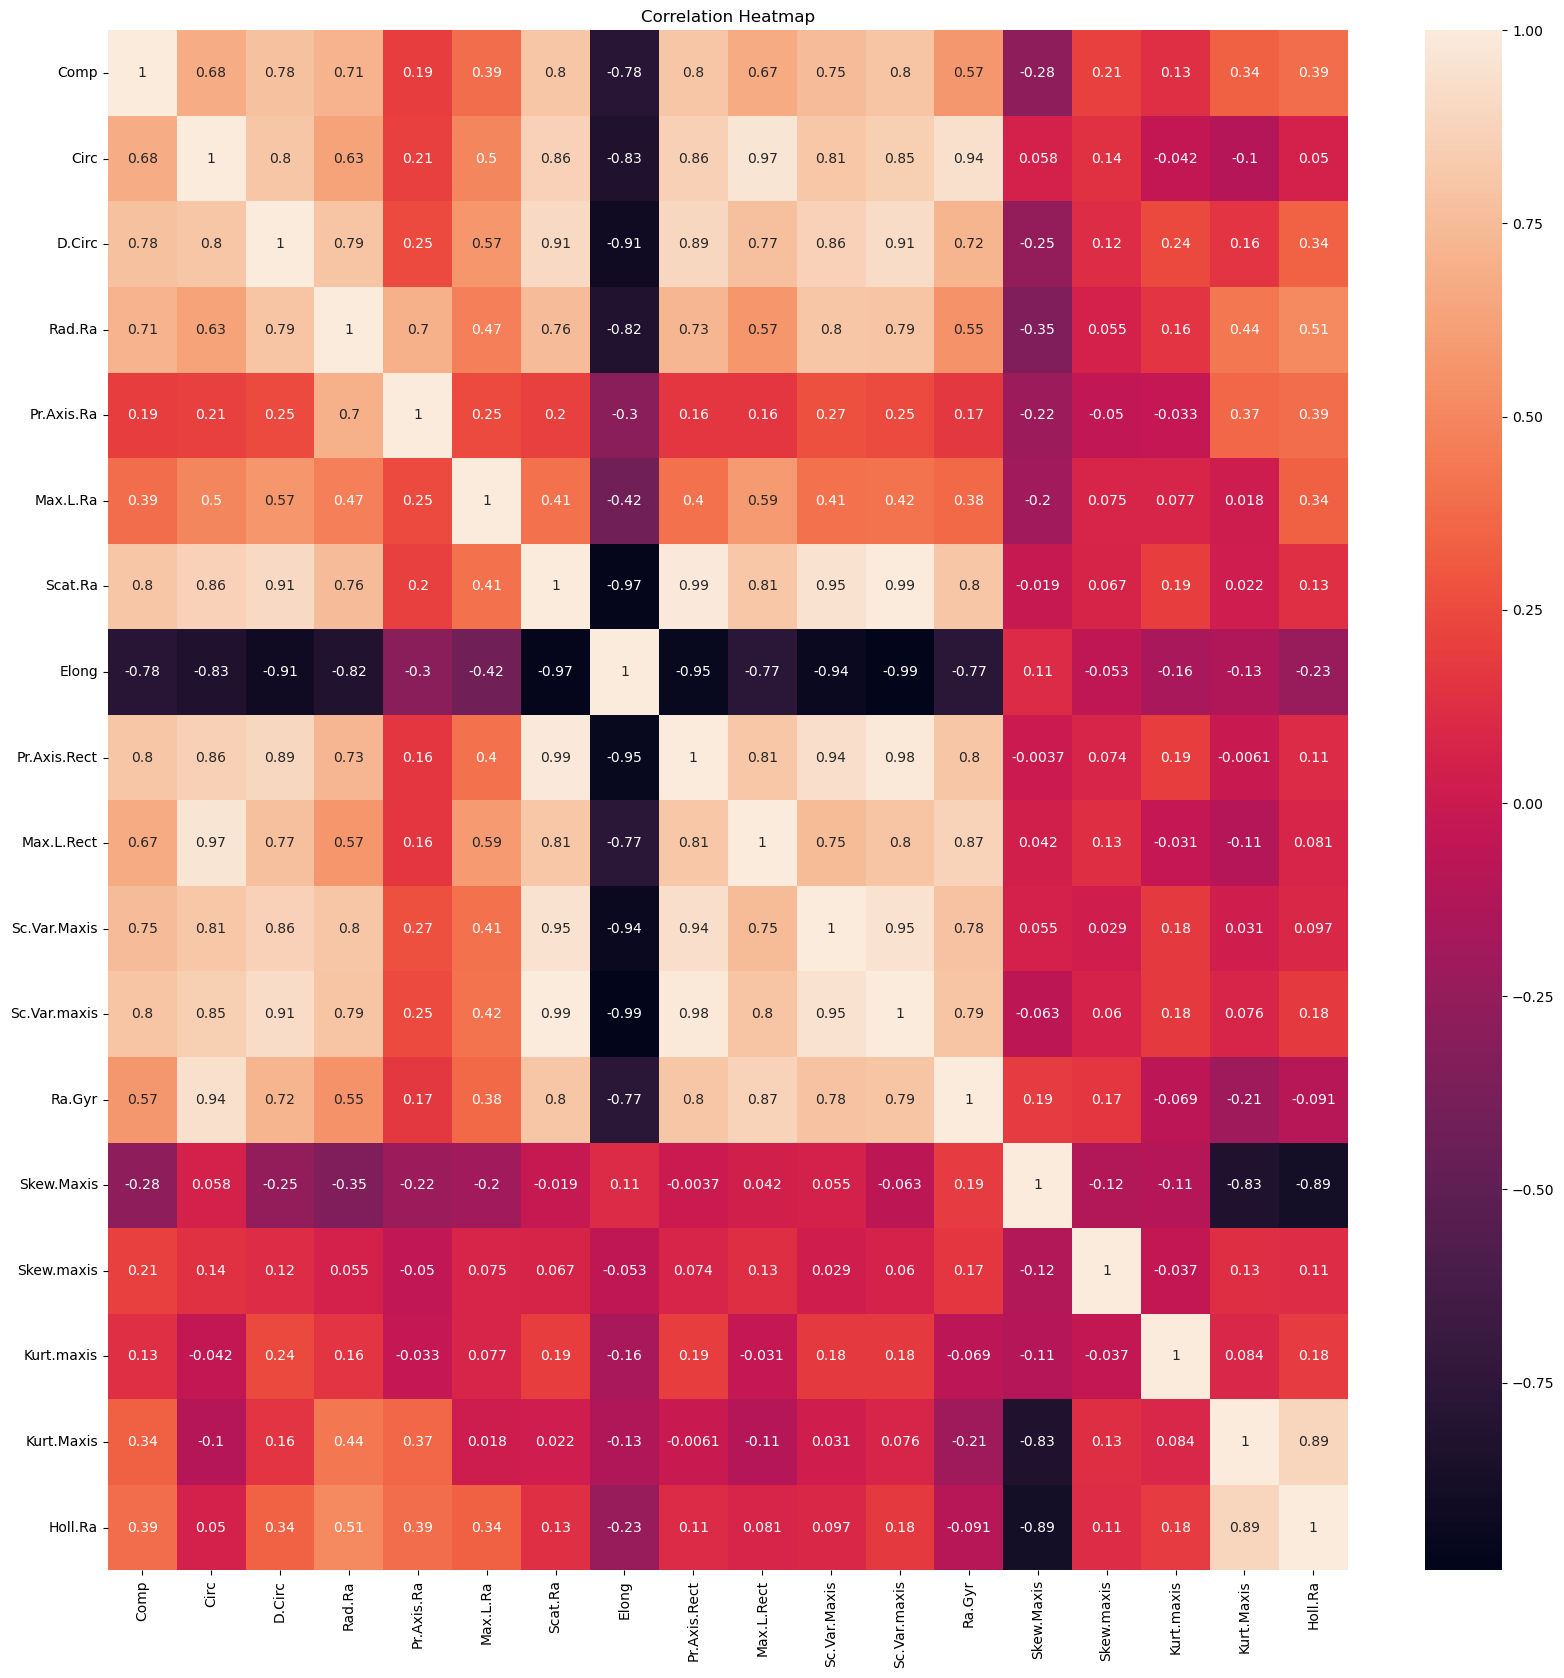

In [16]:
X_corr=data.drop(['Class'],axis=1).corr()
plt.figure(figsize=(20,20))
sns.heatmap(X_corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

### Testing following models with default params for Accuracy

* LogisticRegression
* KNeighborsClassifier
* SVC 
* DecisionTreeClassifier 
* AdaBoostClassifier 
* RandomForestClassifier 
* GradientBoostingClassifier

In [17]:
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
lr=LogisticRegression()
knn=KNeighborsClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()
abc=AdaBoostClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()

In [18]:
from fast_ml.model_development import train_valid_test_split
x_train,y_train,x_val,y_val,x_test,y_test=train_valid_test_split(data,target='Class',train_size=0.6,valid_size=0.2,test_size=0.2,random_state=75)

In [19]:
# reseting index
for i in [x_train,y_train,x_val,y_val,x_test,y_test]:
    data.reset_index(drop=True,inplace=True)

In [20]:
# Normalizing data
x_train=ss.fit_transform(x_train)
x_val=ss.transform(x_val)

#### KNeighborsRegressor

In [21]:
knn.fit(x_train,y_train)
y_preds=knn.predict(x_val)
print('Confusion Matrix :','\n',confusion_matrix(y_val,y_preds),'\n')
print('Accuracy:', accuracy_score(y_preds,y_val))
print('f1 score (micro):', f1_score(y_preds,y_val,average='micro'))
print('f1 score (macro):', f1_score(y_preds,y_val,average='macro'))
print('f1 score (weighted):', f1_score(y_preds,y_val,average='weighted'))

Confusion Matrix : 
 [[43  0  0  0]
 [ 2 18 11  2]
 [ 4 13 13  0]
 [ 6  0  3 29]] 

Accuracy: 0.7152777777777778
f1 score (micro): 0.7152777777777778
f1 score (macro): 0.684192770357571
f1 score (weighted): 0.7227539347960135


#### SupportVectorClassifier

In [22]:
svc.fit(x_train,y_train)
y_preds=svc.predict(x_val)
print('Confusion Matrix :','\n',confusion_matrix(y_val,y_preds),'\n')
print('Accuracy:', accuracy_score(y_preds,y_val))
print('f1 score (micro):', f1_score(y_preds,y_val,average='micro'))
print('f1 score (macro):', f1_score(y_preds,y_val,average='macro'))
print('f1 score (weighted):', f1_score(y_preds,y_val,average='weighted'))

Confusion Matrix : 
 [[42  0  0  1]
 [ 1 21  9  2]
 [ 2 15 12  1]
 [ 4  0  1 33]] 

Accuracy: 0.75
f1 score (micro): 0.75
f1 score (macro): 0.7158193979933111
f1 score (weighted): 0.7594862504645113


#### DecisionTreeClassifier

In [23]:
dtc.fit(x_train,y_train)
y_preds=dtc.predict(x_val)
print('Confusion Matrix :','\n',confusion_matrix(y_val,y_preds),'\n')
print('Accuracy:', accuracy_score(y_preds,y_val))
print('f1 score (micro):', f1_score(y_preds,y_val,average='micro'))
print('f1 score (macro):', f1_score(y_preds,y_val,average='macro'))
print('f1 score (weighted):', f1_score(y_preds,y_val,average='weighted'))

Confusion Matrix : 
 [[38  1  3  1]
 [ 1 11 17  4]
 [ 0 18 10  2]
 [ 4  1  1 32]] 

Accuracy: 0.6319444444444444
f1 score (micro): 0.6319444444444444
f1 score (macro): 0.5966271534651014
f1 score (weighted): 0.6335817280681523


#### AdaBoostClassifier

In [24]:
abc.fit(x_train,y_train)
y_preds=abc.predict(x_val)
print('Confusion Matrix :','\n',confusion_matrix(y_val,y_preds),'\n')
print('Accuracy:', accuracy_score(y_preds,y_val))
print('f1 score (micro):', f1_score(y_preds,y_val,average='micro'))
print('f1 score (macro):', f1_score(y_preds,y_val,average='macro'))
print('f1 score (weighted):', f1_score(y_preds,y_val,average='weighted'))

Confusion Matrix : 
 [[33  8  2  0]
 [ 1 21  8  3]
 [ 3 16 11  0]
 [ 1  0 17 20]] 

Accuracy: 0.5902777777777778
f1 score (micro): 0.5902777777777778
f1 score (macro): 0.583135867489773
f1 score (weighted): 0.57340150731879


#### RandoForestClassifier

In [25]:
rfc.fit(x_train,y_train)
y_preds=rfc.predict(x_val)
print('Confusion Matrix :','\n',confusion_matrix(y_val,y_preds),'\n')
print('Accuracy:', accuracy_score(y_preds,y_val))
print('f1 score (micro):', f1_score(y_preds,y_val,average='micro'))
print('f1 score (macro):', f1_score(y_preds,y_val,average='macro'))
print('f1 score (weighted):', f1_score(y_preds,y_val,average='weighted'))

Confusion Matrix : 
 [[42  0  0  1]
 [ 3 18 11  1]
 [ 3 11 14  2]
 [ 3  0  1 34]] 

Accuracy: 0.75
f1 score (micro): 0.75
f1 score (macro): 0.7172497561680454
f1 score (weighted): 0.7598137344619843


#### GradientBoostingClassifier

In [26]:
gbc.fit(x_train,y_train)
y_preds=gbc.predict(x_val)
print('Confusion Matrix :','\n',confusion_matrix(y_val,y_preds),'\n')
print('Accuracy:', accuracy_score(y_preds,y_val))
print('f1 score (micro):', f1_score(y_preds,y_val,average='micro'))
print('f1 score (macro):', f1_score(y_preds,y_val,average='macro'))
print('f1 score (weighted):', f1_score(y_preds,y_val,average='weighted'))

Confusion Matrix : 
 [[41  0  1  1]
 [ 2 17 13  1]
 [ 1 14 15  0]
 [ 3  0  0 35]] 

Accuracy: 0.75
f1 score (micro): 0.75
f1 score (macro): 0.7210422551789077
f1 score (weighted): 0.7539588074126387


#### LogisticRegression

In [27]:
lr.fit(x_train,y_train)
y_preds=lr.predict(x_val)
print('Confusion Matrix :','\n',confusion_matrix(y_val,y_preds),'\n')
print('Accuracy:', accuracy_score(y_preds,y_val))
print('f1 score (micro):', f1_score(y_preds,y_val,average='micro'))
print('f1 score (macro):', f1_score(y_preds,y_val,average='macro'))
print('f1 score (weighted):', f1_score(y_preds,y_val,average='weighted'))

Confusion Matrix : 
 [[42  0  0  1]
 [ 2 24  7  0]
 [ 0 14 16  0]
 [ 2  0  0 36]] 

Accuracy: 0.8194444444444444
f1 score (micro): 0.8194444444444444
f1 score (macro): 0.7959125369132327
f1 score (weighted): 0.8230046085762449


##### As we are getting better accuracy score with logistic regression Let's tune its hyper-parameters for more accuracy

In [28]:
from sklearn.model_selection import GridSearchCV,KFold
lr=LogisticRegression(max_iter=1000000)
kf=KFold(n_splits=10)
params={'penalty':['l1','l2'],
        'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'C':[0.61,0.63,0.65,0.67,1]
}
gcv=GridSearchCV(lr,param_grid=params,cv=kf)
gcv.fit(x_train,y_train)
y_preds=gcv.predict(x_val)
print('Best Params',gcv.best_params_,'\nBest Score',gcv.best_score_,'\nBest Estimator',gcv.best_estimator_)
print('Confusion Matrix :','\n',confusion_matrix(y_val,y_preds),'\n')
print('Accuracy:', accuracy_score(y_preds,y_val))
print('f1 score (micro):', f1_score(y_preds,y_val,average='micro'))
print('f1 score (macro):', f1_score(y_preds,y_val,average='macro'))
print('f1 score (weighted):', f1_score(y_preds,y_val,average='weighted'))

Best Params {'C': 0.65, 'penalty': 'l1', 'solver': 'liblinear'} 
Best Score 0.7632135306553911 
Best Estimator LogisticRegression(C=0.65, max_iter=1000000, penalty='l1', solver='liblinear')
Confusion Matrix : 
 [[42  0  0  1]
 [ 2 22  8  1]
 [ 0 12 18  0]
 [ 0  0  0 38]] 

Accuracy: 0.8333333333333334
f1 score (micro): 0.8333333333333334
f1 score (macro): 0.8098624441264689
f1 score (weighted): 0.8368038994325665


#### Accuracy score with default Parameters was 0.8195. Now we got 0.834

### Feature selection using RFE With Tuned LogisticRegression

In [29]:
x_train.shape

(431, 18)

In [30]:
estimator=gcv.best_estimator_

In [31]:
# The best number of features based on the Highest Accuracy score (with tuned hyperparams)
from sklearn.feature_selection import RFE
results=[]
for num_feature in list(range(1,19)):
    rfe=RFE(estimator,n_features_to_select=num_feature)
    rfe.fit(x_train,y_train)
    gcv.fit(x_train[:,rfe.support_],y_train)
    y_preds=gcv.predict(x_val[:,rfe.support_])
    results.append(accuracy_score(y_preds,y_val))

best_features=(range(1, 19)[np.argmax(results)])
print('Best Number of Features: ',best_features)
print('Best Accuracy Score: ',max(results))

rfe=RFE(estimator,n_features_to_select=best_features)
rfe.fit(x_train,y_train)
gcv.fit(x_train[:,rfe.support_],y_train)
y_preds=gcv.predict(x_val[:,rfe.support_])

print('Confusion Matrix :','\n',confusion_matrix(y_val,y_preds),'\n')
print('Accuracy:', accuracy_score(y_preds,y_val))
print('f1 score (micro):', f1_score(y_preds,y_val,average='micro'))
print('f1 score (macro):', f1_score(y_preds,y_val,average='macro'))
print('f1 score (weighted):', f1_score(y_preds,y_val,average='weighted'))

# Top Features
print('Top Features : ',best_features,'\n',data.drop(['Class'],axis=1).columns[rfe.support_])

Best Number of Features:  16
Best Accuracy Score:  0.8333333333333334
Confusion Matrix : 
 [[43  0  0  0]
 [ 2 23  7  1]
 [ 0 12 18  0]
 [ 2  0  0 36]] 

Accuracy: 0.8333333333333334
f1 score (micro): 0.8333333333333334
f1 score (macro): 0.8116428995840761
f1 score (weighted): 0.8366056809929359
Top Features :  16 
 Index(['Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra', 'Elong',
       'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis', 'Sc.Var.maxis', 'Ra.Gyr',
       'Skew.Maxis', 'Skew.maxis', 'Kurt.Maxis', 'Holl.Ra'],
      dtype='object')


#### Withbest no. of features i.e. 17 features we are getting same accuracy of 0.834 (features reduced from 18 to 17)

### Now testing the final model with test set

In [32]:
x_test=ss.transform(x_test)

In [33]:
#final model

rfe=RFE(estimator,n_features_to_select=best_features)
rfe.fit(x_train,y_train)
gcv.fit(x_train[:,rfe.support_],y_train)
y_preds=gcv.predict(x_test[:,rfe.support_])
print('Confusion Matrix :','\n',confusion_matrix(y_test,y_preds),'\n')
print('Accuracy:', accuracy_score(y_preds,y_test))
print('f1 score (micro):', f1_score(y_preds,y_test,average='micro'))
print('f1 score (macro):', f1_score(y_preds,y_test,average='macro'))
print('f1 score (weighted):', f1_score(y_preds,y_test,average='weighted'))

Confusion Matrix : 
 [[32  1  1  0]
 [ 2 19 13  1]
 [ 2 14 19  0]
 [ 2  0  0 38]] 

Accuracy: 0.75
f1 score (micro): 0.75
f1 score (macro): 0.7401155931093772
f1 score (weighted): 0.7532123560506777


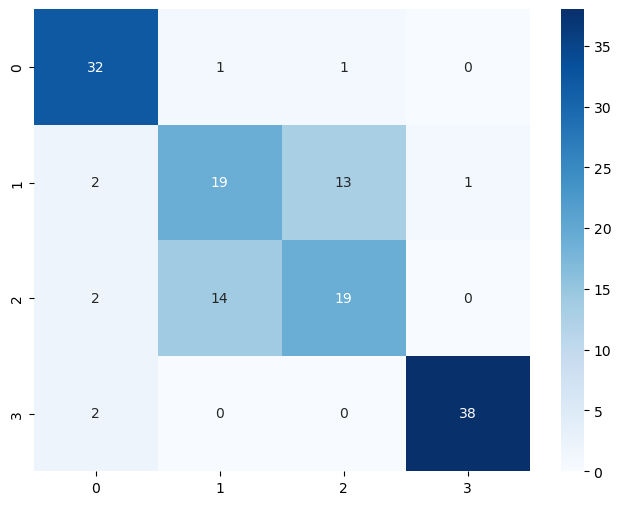

In [34]:
cm = confusion_matrix(y_test,y_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()

In [35]:
print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        38
           1       0.54      0.56      0.55        34
           2       0.54      0.58      0.56        33
           3       0.95      0.97      0.96        39

    accuracy                           0.75       144
   macro avg       0.74      0.74      0.74       144
weighted avg       0.76      0.75      0.75       144



In [ ]:
# Saving the model
import pickle
with open('final_model.pkl', 'wb') as file:
    pickle.dump(estimator, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(ss, f)